In [286]:
                                        #Sales Channel Prediction Case Study#

Problem Statement:
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

In [287]:
#importing the libary
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [288]:
# print top data

df=pd.read_csv('D:\project-datatrained\Advertising.csv')

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


print head columns

In [289]:
df.shape

(200, 5)

in data set there are 200 row and 5 columns

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


dataset has int and float datatype

In [291]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


all columns has 200 row there is no missing data

Data Cleaning

In [292]:
df.drop("Unnamed: 0",axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


here we remove the Unnamed: 0 columns

In [293]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

there is no null value,hence cleaning is not required.

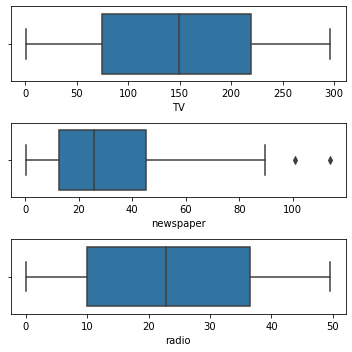

In [294]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [295]:
df.skew() #greater than +0.5 less than -0.5

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [296]:
data=df.copy()

create a copy of dataset

In [297]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.72341210e+00 9.69852266e-01 9.81522472e-01 1.77894547e+00
  1.55205313e+00]
 [1.70609137e+00 1.19737623e+00 1.08280781e+00 6.69578760e-01
  6.96046111e-01]
 [1.68877065e+00 1.51615499e+00 1.52846331e+00 1.78354865e+00
  9.07405869e-01]
 [1.67144992e+00 5.20496822e-02 1.21785493e+00 1.28640506e+00
  8.60330287e-01]
 [1.65412920e+00 3.94182198e-01 8.41613655e-01 1.28180188e+00
  2.15683025e-01]
 [1.63680847e+00 1.61540845e+00 1.73103399e+00 2.04592999e+00
  1.31091086e+00]
 [1.61948775e+00 1.04557682e+00 6.43904671e-01 3.24708413e-01
  4.27042783e-01]
 [1.60216702e+00 3.13436589e-01 2.47406325e-01 8.72486994e-01
  1.58039455e-01]
 [1.58484630e+00 1.61657614e+00 1.42906863e+00 1.36042422e+00
  1.77205942e+00]
 [1.56752558e+00 6.16042873e-01 1.39530685e+00 4.30581584e-01
  6.57617064e-01]
 [1.55020485e+00 9.45155670e-01 1.17923146e+00 2.92486143e-01
  1.04190753e+00]
 [1.53288413e+00 7.90028350e-01 4.96973404e-02 1.22232878e+00
  6.48970529e-01]
 [1.51556340e+00 1.43908760e+00 7.992088

#using z score method remove the outlier

In [298]:
threshold = 3
print(np.where(z > 3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [299]:
#The first array contains the list of row numbers and second array respective column numbers

In [300]:
data = data[(z < 3).all(axis=1)]

In [301]:
print(df.shape)
print(data.shape)

(200, 5)
(198, 5)


In [302]:
#old data set has 200 row and new has 198 row

In [303]:
loss_percentage=((200-198)/200)*100
print("loss_percentage",loss_percentage)

loss_percentage 1.0


#after removing outlier we lossing 1% of data

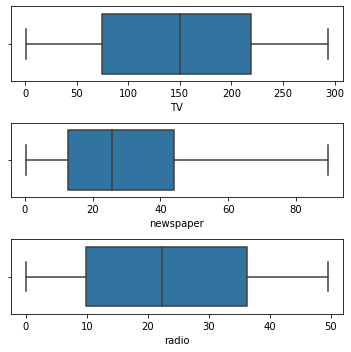

In [304]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['radio'], ax = axs[2])
plt.tight_layout()

after removing outlier there is no outlier present.

Univariate Analysis

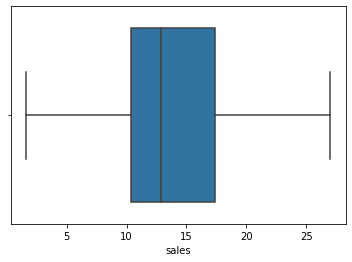

In [305]:
sns.boxplot(df['sales'])
plt.show()

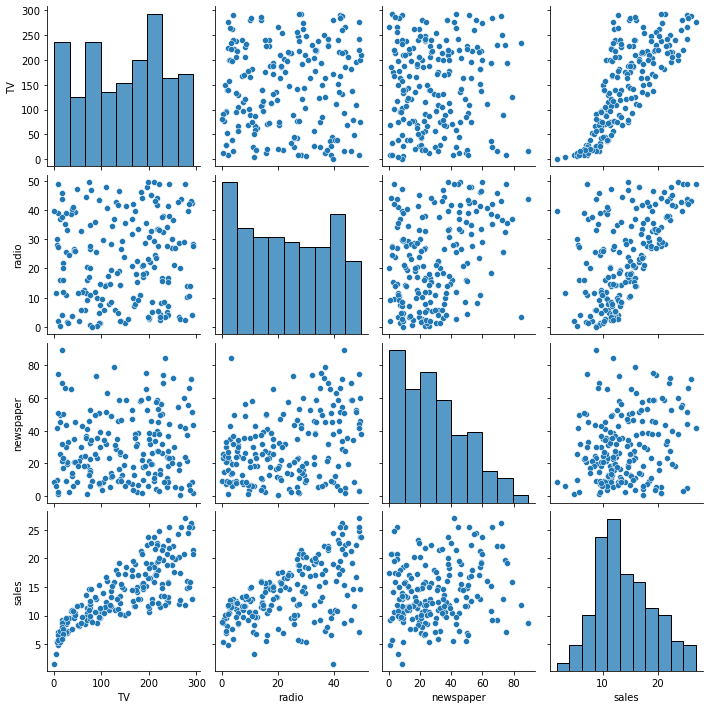

In [306]:
sns.pairplot(data.drop("Unnamed: 0",axis=1))

In [307]:
#find the correlation
cor=data.corr()
cor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.010991,-0.105193,-0.137040,-0.054703
TV,0.010991,1.000000,0.051978,0.049771,0.779121
radio,-0.105193,0.051978,1.000000,0.346364,0.576748
newspaper,-0.137040,0.049771,0.346364,1.000000,0.219555
sales,-0.054703,0.779121,0.576748,0.219555,1.000000


In [308]:
in correlation data TV and sales has highest which is 0.77

SyntaxError: invalid syntax (<ipython-input-308-4d5a6feff1af>, line 1)

In [ ]:
#prepare heat map for correlation

plt.subplots(figsize=(8,8))
sns.heatmap(cor,annot=True,linewidth=0.1,linecolor="black",cmap="YlGnBu")

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

Model Building
Performing Simple Linear Regression

In [ ]:
X =data.drop(["sales","Unnamed: 0"],axis=1)
y =data['sales']

#separating the target and feature

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#apply standascalermethod for scale the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
# Let's now take a look at the train dataset

X_train.head()

In [ ]:
y_train.head()

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

In [ ]:
regression.score(X_train,y_train)

In [ ]:
regression.score(X_test,y_test)

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

after evaluating the LinearRegression model.test score and r2 score is same.

In [ ]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    regression.fit(X_train,y_train)
    pred_train=regression.predict(X_train)
    pred_test=regression.predict(X_test)
    print(f" At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f" At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print("\n")

In [ ]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testin is {Test_accuracy}")
    print("\n")

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual sales',fontsize=19)
plt.ylabel('predicted sales',fontsize=19)
plt.title('Linear Regression',fontsize=18)
plt.show()

best fit line covering most of the data point which show good fit of model

Regularization:

In [309]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [310]:
from sklearn.linear_model import Lasso

parameters={'alpha' :[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [311]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.9300164738230503

In [312]:
cv_score=cross_val_score(ls,X,y,cv=2)
cv_score=cv_score.mean()
cv_mean

0.8810485430282271

Ensemble technique:

In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [314]:
rf=RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=2)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)


R2 Score: 98.01282019649425
cross_val_score: 97.02485673396704


save the model in sales.pk file

In [315]:
#import bz2
import pickle
filename="Sales.pk1"
pickle.dump(rf,open(filename,'wb'))

conclusion:

In [316]:
loaded_model=pickle.load(open('Sales.pk1','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.9801282019649424


In [317]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["predicted","orginal"])

In [318]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
predicted,12.241,7.162,11.289,8.167,9.879,11.738,11.455,12.833,21.184,20.606,...,14.202,18.451,14.776,14.397,14.828,11.7,8.372,23.993,23.548,20.143
orginal,12.241,7.162,11.289,8.167,9.879,11.738,11.455,12.833,21.184,20.606,...,14.202,18.451,14.776,14.397,14.828,11.7,8.372,23.993,23.548,20.143


print the orinal and predicted sales.